# Gaussian Mixture Model Evaluation

In [1]:
import sys
import os

# Get the absolute path of the parent directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the parent directory to sys.path
sys.path.insert(0, parent_dir)

In [2]:
# Import libraries
import numpy as np
import scipy
import matplotlib.pyplot as plt
from src.gaussian_mixture_model import GMM

# 1. Generate Synthetic Data

The following code generates synthetic data by sampling from two Gaussian distributions with specified means and standard deviations.

In [3]:
# Set seed for reproducibility
np.random.seed(42) 

# K: number of components (Gaussian)
# D: dimension of each Gaussian
n_samples = 500

# 1D example
# true_means = np.array([[-5], [0], [5]]) # (K, D) - mean of each gaussian at each dimension
# true_stds = np.array([[0.8], [1.0], [0.5]]) # (K, D) - std of each gaussian at each dimension
# true_weights = np.array([0.3, 0.4, 0.3]) # (K,) - weight of each gaussian

# 2D example
true_means = np.array([[-5, -2], [0, 2], [5, 5]]) # (K, D) - mean of each gaussian at each dimension
true_stds = np.array([[0.8, 0.3], [1.0, 0.3], [0.5, 1.0]]) # (K, D) - std of each gaussian at each dimension
true_weights = np.array([0.3, 0.4, 0.3]) # (K,) - weight of each gaussian

true_variances = true_stds**2

print(f"Shape of true_means = {true_means.shape}")
print(f"Shape of true_variances = {true_variances.shape}")
print(f"Shape of true_weights = {true_weights.shape}")

true_K = true_means.shape[0] # number of components
D = true_means.shape[1] # dimension
print(f"K = {true_K}")
print(f"D = {D}")

# Create synthetic dataset
data = np.concatenate([
    np.random.normal(loc=mean, scale=std, size=(int(weight * n_samples), D)) 
    for mean, std, weight in zip(true_means, true_stds, true_weights)
], axis=0)
print(f"Shape of data = {data.shape}")

Shape of true_means = (3, 2)
Shape of true_variances = (3, 2)
Shape of true_weights = (3,)
K = 3
D = 2
Shape of data = (500, 2)


### 1.1 True PDF

Plot the true pdf that the data generated at each dimension

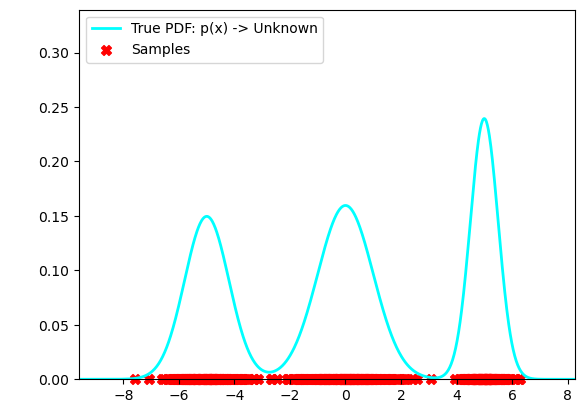

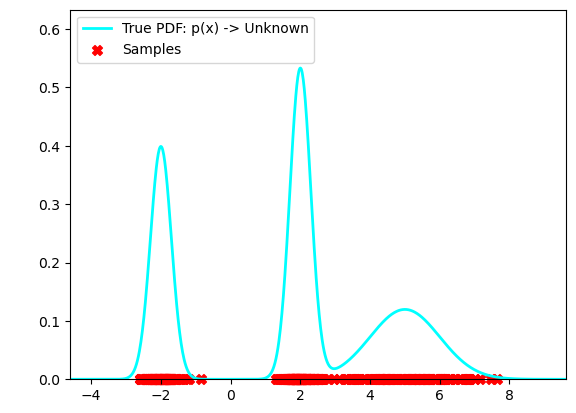

In [4]:
# Plot True pdf at each dimension
for d in range(D):
    x_values = np.linspace(min(data[:, d]) - 2, max(data[:, d]) + 2, 1000)

    density = np.zeros_like(x_values)
    for k in range(true_K):
        pdf = (1 / np.sqrt(2 * np.pi * true_variances[k, d])) * np.exp(-0.5 * ((x_values - true_means[k, d])**2) / true_variances[k, d])
        density += (true_weights[k] * pdf)
    plt.plot(x_values, density, color='cyan', linewidth=2, label='True PDF: p(x) -> Unknown')

    # Plot samples from the pdf
    plt.scatter(data[:, d], np.zeros_like(data[:, d]), c='red', marker='X', s=50, label='Samples', clip_on=False)

    plt.ylabel('Probability Density', color='white', fontsize=16)
    plt.legend(loc='upper left')
    plt.grid(False)
    plt.xlim(min(data[:, d]) - 2, max(data[:, d]) + 2)
    plt.ylim(0.0, max(density) + 0.1)
    plt.show()

## 2. Fit GMM to data

In [5]:
K = 3
D = data.shape[1]
custom_gmm = GMM(K=K, D=D)

nll_history = custom_gmm.fit(data)

Converged after 7 iterations


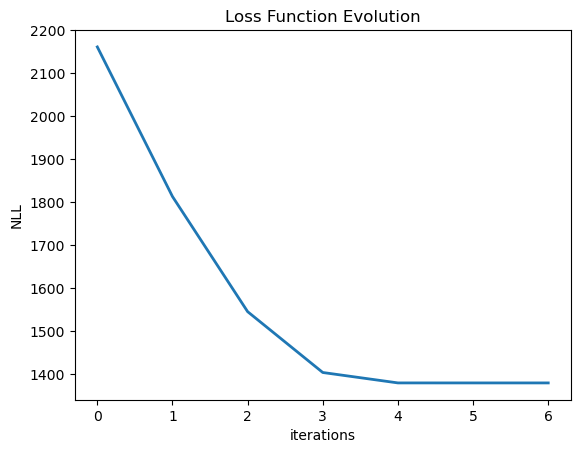

In [6]:
# Plot NLL
plt.plot(range(len(nll_history)), nll_history, linewidth=2)
plt.title('Loss Function Evolution')
plt.ylabel('NLL')
plt.xlabel('iterations')
plt.show()

## 3. Model Evaluation

### 3.1 True vs. Predicted PDF

Plot the true pdf that the data generated at each dimension and the pdf predicted by GMM

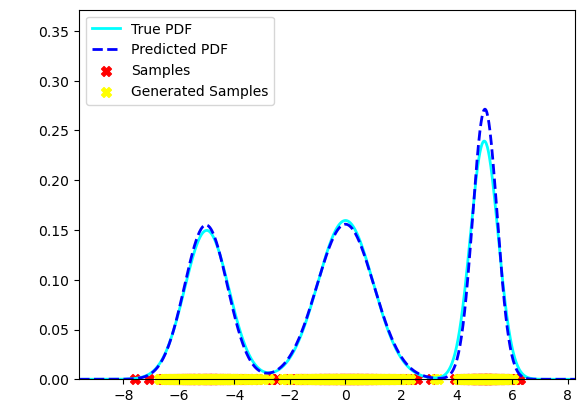

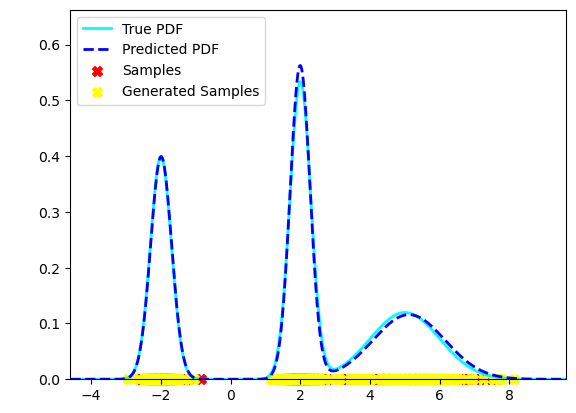

In [8]:
for d in range(D):
    x_values = np.linspace(min(data[:, d]) - 2, max(data[:, d]) + 2, 1000)

    # Plot true density
    density = np.zeros_like(x_values)
    for k in range(true_K):
        pdf = (1 / np.sqrt(2 * np.pi * true_variances[k, d])) * np.exp(-0.5 * ((x_values - true_means[k, d])**2) / true_variances[k, d])
        density += (true_weights[k] * pdf)
    plt.plot(x_values, density, color='cyan', linewidth=2, label='True PDF')

    # Plot predicted density
    pred_density = np.zeros_like(x_values)
    for k in range(K):
        pdf = (1 / np.sqrt(2 * np.pi * custom_gmm.variances[k, d])) * np.exp(-0.5 * ((x_values - custom_gmm.means[k, d])**2) / custom_gmm.variances[k, d])
        pred_density += (custom_gmm.weights[k] * pdf)
    plt.plot(x_values, pred_density, color='blue', linewidth=2, linestyle='--', label='Predicted PDF')

    # Plot samples generated from true density
    plt.scatter(data[:, d], np.zeros_like(data[:, d]), c='red', marker='X', s=50, label='Samples', clip_on=False)

    # Generate samples from the predicted density and plot
    data_samples = custom_gmm.sample(500)
    plt.scatter(data_samples[:, d], np.zeros_like(data_samples[:, d]), c='yellow', marker='X', s=50, label='Generated Samples', clip_on=False)

    plt.ylabel('Probability Density', color='white', fontsize=16)
    plt.legend(loc='upper left')
    plt.grid(False)
    plt.xlim(min(data[:, d]) - 2, max(data[:, d]) + 2)
    plt.ylim(0.0, max(max(density), max(pred_density)) + 0.1)
    plt.show()